## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) ) 


In [2]:
# link necessary libraries
library(tidyverse)
library(corrplot)

# settings for plot visualisation
options(repr.plot.height = 5, repr.plot.res = 200)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded



Načítanie datasetu - dataset viete funkciami dostupnými v R stiahnuť a rozbaliť aj z formátu ZIP

In [3]:
# URL of the dataset
dataset_url <- "https://archive.ics.uci.edu/static/public/519/heart+failure+clinical+records.zip"

# create temporary destination file path with .zip extension
dest_file <- tempfile(fileext = ".zip")

# download the dataset, mode = write binary
download.file(dataset_url, destfile = dest_file, mode = "wb")

# unzip the file into chosen location (enter directory)
unzip(dest_file, exdir = "C:\\Windows\\System32\\SleepStudy") # TODO fill in

### Úloha 1 (1b)

Načítajte dataset do premennej `data_hw`.

In [4]:
data_hw <- read.csv("heart_failure_clinical_records_dataset.csv")

glimpse(data_hw)

Rows: 299
Columns: 13
$ age                      <dbl> 75, 55, 65, 50, 65, 90, 75, 60, 65, 80, 75, 6…
$ anaemia                  <int> 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, …
$ creatinine_phosphokinase <int> 582, 7861, 146, 111, 160, 47, 246, 315, 157, …
$ diabetes                 <int> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ ejection_fraction        <int> 20, 38, 20, 20, 20, 40, 15, 60, 65, 35, 38, 2…
$ high_blood_pressure      <int> 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, …
$ platelets                <dbl> 265000, 263358, 162000, 210000, 327000, 20400…
$ serum_creatinine         <dbl> 1.90, 1.10, 1.30, 1.90, 2.70, 2.10, 1.20, 1.1…
$ serum_sodium             <int> 130, 136, 129, 137, 116, 132, 137, 131, 138, …
$ sex                      <int> 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, …
$ smoking                  <int> 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, …
$ time                     <int> 4, 6, 7, 7, 8, 8, 10, 10, 10, 10, 10, 10, 11,…
$ DEATH_EVENT     

   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

In [ ]:
NIE

In [5]:
data_na <- any(is.na(data_hw))

print(data_na)

if (!data_na) {
    print("There are no NA values")
} else {
    print("There are SOME NA values")
}

[1] FALSE
[1] "There are no NA values"


In [ ]:
**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age -> numerická
- anaemia -> kategorická (buď 0 alebo 1)
- high_blood_pressure -> kategorická (buď 0 alebo 1)
- serum_sodium -> numerická
- death_event -> kategorická (buď 0 alebo 1)

In [24]:
glimpse(data_hw)

Rows: 299
Columns: 13
$ age                      <dbl> 75, 55, 65, 50, 65, 90, 75, 60, 65, 80, 75, 6…
$ anaemia                  <int> 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, …
$ creatinine_phosphokinase <int> 582, 7861, 146, 111, 160, 47, 246, 315, 157, …
$ diabetes                 <int> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ ejection_fraction        <int> 20, 38, 20, 20, 20, 40, 15, 60, 65, 35, 38, 2…
$ high_blood_pressure      <int> 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, …
$ platelets                <dbl> 265000, 263358, 162000, 210000, 327000, 20400…
$ serum_creatinine         <dbl> 1.90, 1.10, 1.30, 1.90, 2.70, 2.10, 1.20, 1.1…
$ serum_sodium             <int> 130, 136, 129, 137, 116, 132, 137, 131, 138, …
$ sex                      <int> 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, …
$ smoking                  <int> 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, …
$ time                     <int> 4, 6, 7, 7, 8, 8, 10, 10, 10, 10, 10, 10, 11,…
$ DEATH_EVENT     

**Obsahuje dataset duplicitné záznamy?** 

In [6]:
data_unique <- data_hw %>%
     distinct()


glimpse(data_unique)
glimpse(data_hw)

Rows: 299
Columns: 13
$ age                      <dbl> 75, 55, 65, 50, 65, 90, 75, 60, 65, 80, 75, 6…
$ anaemia                  <int> 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, …
$ creatinine_phosphokinase <int> 582, 7861, 146, 111, 160, 47, 246, 315, 157, …
$ diabetes                 <int> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ ejection_fraction        <int> 20, 38, 20, 20, 20, 40, 15, 60, 65, 35, 38, 2…
$ high_blood_pressure      <int> 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, …
$ platelets                <dbl> 265000, 263358, 162000, 210000, 327000, 20400…
$ serum_creatinine         <dbl> 1.90, 1.10, 1.30, 1.90, 2.70, 2.10, 1.20, 1.1…
$ serum_sodium             <int> 130, 136, 129, 137, 116, 132, 137, 131, 138, …
$ sex                      <int> 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, …
$ smoking                  <int> 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, …
$ time                     <int> 4, 6, 7, 7, 8, 8, 10, 10, 10, 10, 10, 10, 11,…
$ DEATH_EVENT     

### Úloha 2 (1b)

Skúmajte premennú 'sex' (pohlavie). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž) 

In [7]:
data_sex <- data_hw$sex
glimpse(data_sex)

 int [1:299] 1 1 1 1 0 1 1 1 0 1 ...


**Koľko záznamov mužov a žien obsahuje dataset?**

In [8]:
muzi <- sum(data_sex == 1)
muzi

muzi_alt <- sum(data_hw$sex == 1)
muzi_alt

zeny <- sum(data_sex == 0)
zeny

zeny_alt <- sum(data_hw$sex == 0)
zeny_alt

[1] 194

[1] 194

[1] 105

[1] 105

**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

In [9]:
muzi_nefajc <- sum(data_hw$smoking == 0 & data_hw$sex == 1)
muzi_nefajc

muzi_fajc <-  sum(data_hw$smoking == 1 & data_hw$sex == 1)
muzi_fajc


zeny_nefajc <-  sum(data_hw$smoking == 0 & data_hw$sex == 0)
zeny_nefajc

zeny_fajc <-  sum(data_hw$smoking == 1 & data_hw$sex == 0)
zeny_fajc

[1] 102

[1] 92

[1] 101

[1] 4

### Úloha 3 (1b)

Popíšte premennú 'age' (vek).

In [10]:
summary(data_hw$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.00   51.00   60.00   60.83   70.00   95.00 

**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

**Z akého veku je v datasete najviac záznamov?**

In [11]:
age_table <- table(data_hw$age)
age_table

index <- which.max(age_table)
print(index)

print(age_table[index])


    40     41     42     43     44     45     46     47     48     49     50 
     7      1      7      1      2     19      3      1      2      4     27 
    51     52     53     54     55     56     57     58     59     60 60.667 
     4      5     10      2     17      1      2     10      4     33      2 
    61     62     63     64     65     66     67     68     69     70     72 
     4      5      8      3     26      2      2      5      3     25      7 
    73     75     77     78     79     80     81     82     85     86     87 
     4     11      2      2      1      7      1      3      6      1      1 
    90     94     95 
     3      1      2 

60 
21 
60 
33 


### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

- pre vytvorenie premennej použite funkciu ifelse - https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/ifelse

In [12]:
data_hw$risk <- ifelse(data_hw$age > 50 & data_hw$serum_creatinine > 1.2, 'High', 'Low')

In [14]:
glimpse(data_hw)

Rows: 299
Columns: 14
$ age                      <dbl> 75, 55, 65, 50, 65, 90, 75, 60, 65, 80, 75, 6…
$ anaemia                  <int> 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, …
$ creatinine_phosphokinase <int> 582, 7861, 146, 111, 160, 47, 246, 315, 157, …
$ diabetes                 <int> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ ejection_fraction        <int> 20, 38, 20, 20, 20, 40, 15, 60, 65, 35, 38, 2…
$ high_blood_pressure      <int> 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, …
$ platelets                <dbl> 265000, 263358, 162000, 210000, 327000, 20400…
$ serum_creatinine         <dbl> 1.90, 1.10, 1.30, 1.90, 2.70, 2.10, 1.20, 1.1…
$ serum_sodium             <int> 130, 136, 129, 137, 116, 132, 137, 131, 138, …
$ sex                      <int> 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, …
$ smoking                  <int> 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, …
$ time                     <int> 4, 6, 7, 7, 8, 8, 10, 10, 10, 10, 10, 10, 11,…
$ DEATH_EVENT     

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

- počet stĺpcov (atribút 'breaks') môže mať predvolenú hodnotu, nemusíte ho špecifikovať

- funkcia hist - https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/hist

(hint: použite funkciu filter na záznamy, kde 'risk' == 'High', a v histograme ako dáta vložte hodnoty z premennej 'age')

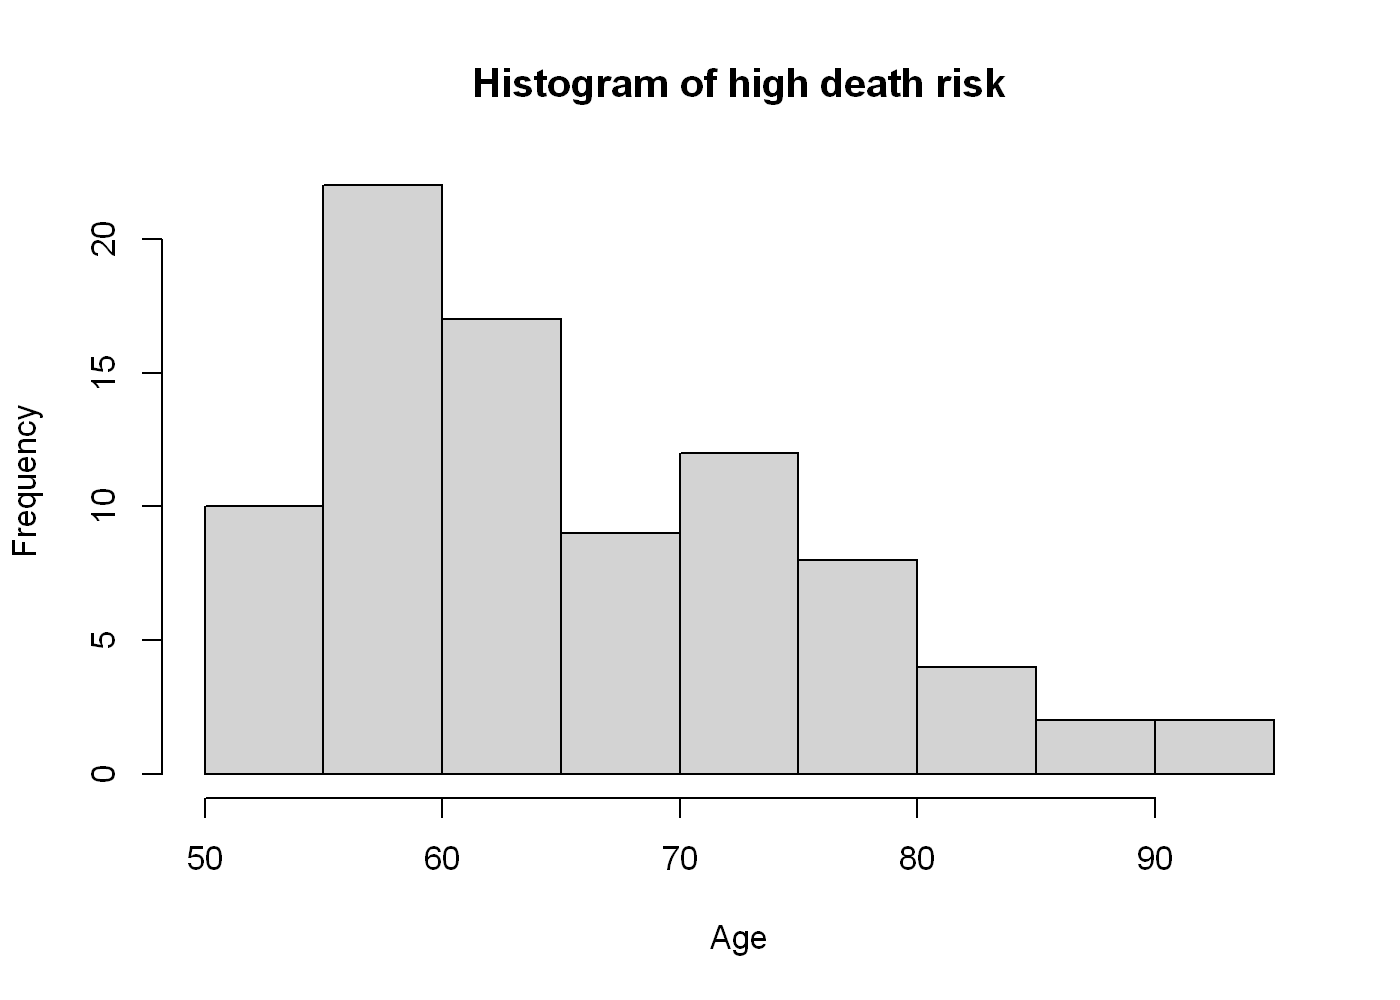

In [20]:
fil <- data_hw %>%
    filter(risk == 'High')
hist(fil$age, main = 'Histogram of high death risk', xlab = 'Age')

**V akom veku je riziko zlyhania srdca najväčšie?**

In [23]:
vek_tab = table(data_hw$age[data_hw$risk == 'High'])
vek_tab

vek <- which.max(vek_tab)
vek


    51     52     53     54     55     56     58     59     60 60.667     61 
     1      1      3      2      3      1      2      1     18      1      1 
    63     64     65     68     69     70     72     73     75     77     78 
     2      2     11      1      1      7      4      2      6      1      1 
    79     80     82     85     86     90     94     95 
     1      5      1      3      1      1      1      1 

60 
 9

**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

In [24]:
vek_tab


    51     52     53     54     55     56     58     59     60 60.667     61 
     1      1      3      2      3      1      2      1     18      1      1 
    63     64     65     68     69     70     72     73     75     77     78 
     2      2     11      1      1      7      4      2      6      1      1 
    79     80     82     85     86     90     94     95 
     1      5      1      3      1      1      1      1 

### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

- korelácia sa dá analyzovať iba na numerických premenných, preto musíte dátový typ premennej zmeniť na kategorický a ten uložiť vo formáte 'integer' alebo 'numeric'.


Rows: 299
Columns: 14
$ age                      <dbl> 75, 55, 65, 50, 65, 90, 75, 60, 65, 80, 75, 6…
$ anaemia                  <int> 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, …
$ creatinine_phosphokinase <int> 582, 7861, 146, 111, 160, 47, 246, 315, 157, …
$ diabetes                 <int> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ ejection_fraction        <int> 20, 38, 20, 20, 20, 40, 15, 60, 65, 35, 38, 2…
$ high_blood_pressure      <int> 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, …
$ platelets                <dbl> 265000, 263358, 162000, 210000, 327000, 20400…
$ serum_creatinine         <dbl> 1.90, 1.10, 1.30, 1.90, 2.70, 2.10, 1.20, 1.1…
$ serum_sodium             <int> 130, 136, 129, 137, 116, 132, 137, 131, 138, …
$ sex                      <int> 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, …
$ smoking                  <int> 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, …
$ time                     <int> 4, 6, 7, 7, 8, 8, 10, 10, 10, 10, 10, 10, 11,…
$ DEATH_EVENT     

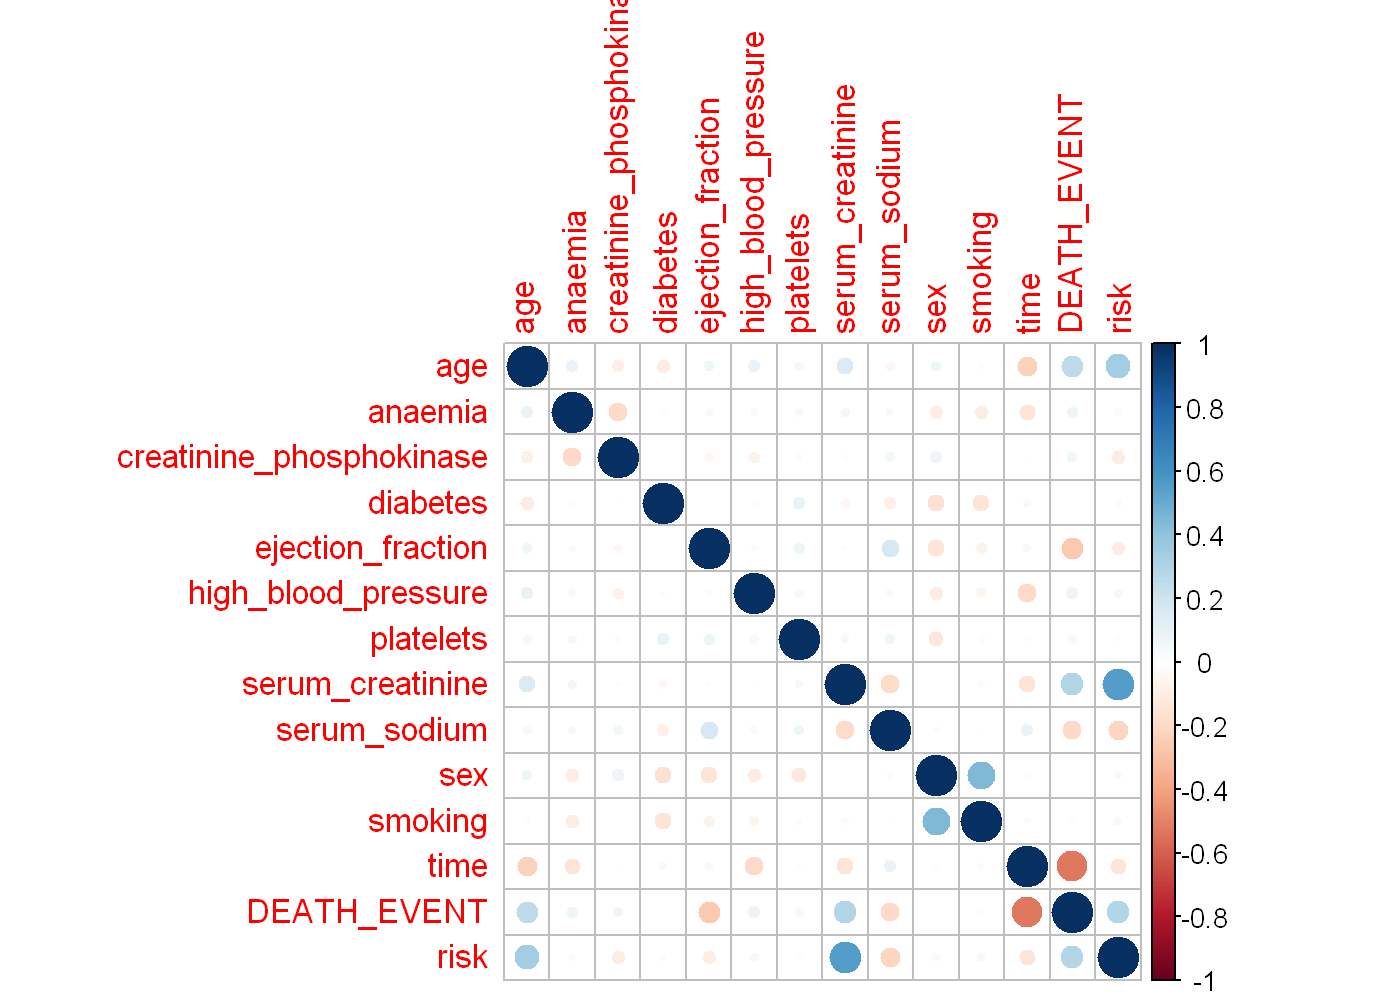

In [30]:
data_hw_pom <- data_hw
data_hw_pom$risk <- ifelse(data_hw_pom$risk == 'High', 1,0)
glimpse(data_hw_pom)

data_hw_matrix <- cor(data_hw_pom)

corrplot(data_hw_matrix)

**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure